# Plot delta Mag vs G - I


- author : Sylvie Dagoret
- affiliation : LAL/IN2P3/CNRS
- creation date : October 15th 2018
- update : October 22th 2018

In [138]:
import pandas as pd
import numpy as np
import os,sys
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline
from scipy.interpolate import interp1d

In [139]:
import os
import re

In [140]:
from astropy.io import fits

In [141]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [142]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [143]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (14, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [144]:
path='.'
txt_files = [f for f in os.listdir(path) if f.endswith('.txt')]  

In [145]:
txt_files

['dataout_DeltaGvsGmI_z16.txt',
 'dataout_DeltaYvsImZ_z14.txt',
 'dataout_DeltaRvsGmI_z14.txt',
 'dataout_DeltaYvsGmI_z12.txt',
 'dataout_DeltaYvsImZ_z18.txt',
 'dataout_DeltaYvsGmI_z20.txt',
 'dataout_DeltaGvsGmI_z14.txt',
 'dataout_DeltaR2vsGmI_z10.txt',
 'dataout_DeltaGvsGmI_z12.txt',
 'dataout_DeltaR2vsGmI_z20.txt',
 'dataout_DeltaYvsGmI_z10.txt',
 'dataout_DeltaYvsGmI_z16.txt',
 'dataout_DeltaRvsGmI_z20.txt',
 'dataout_DeltaIvsGmI_z20.txt',
 'dataout_DeltaR2vsGmI_z18.txt',
 'dataout_DeltaGvsGmI_z20.txt',
 'dataout_DeltaYvsImZ_z12.txt',
 'dataout_DeltaIvsGmI_z12.txt',
 'dataout_DeltaGvsGmI_z10.txt',
 'dataout_DeltaR2vsGmI_z14.txt',
 'dataout_DeltaGvsGmI_z18.txt',
 'dataout_DeltaIvsGmI_z18.txt',
 'dataout_DeltaRvsGmI_z10.txt',
 'dataout_DeltaR2vsGmI_z12.txt',
 'dataout_DeltaIvsGmI_z14.txt',
 'dataout_DeltaR2vsGmI_z16.txt',
 'dataout_DeltaYvsImZ_z16.txt',
 'dataout_DeltaYvsGmI_z14.txt',
 'dataout_DeltaYvsImZ_z10.txt',
 'dataout_DeltaYvsGmI_z18.txt',
 'dataout_DeltaIvsGmI_z16.txt',
 '

# Definitions

### Delta Y vs G-I

In [146]:
#keysel_filename='^dataout_DeltaYvsGmI_z*'
#keysel2_filename='^dataout_DeltaYvsGmI_z([0-9]+)*'

In [147]:
#title="$\Delta Y$ vs G-I (pwv-optimized at each airmass)"
#xlabel="color : G-I (mag)"
#ylabel="$\Delta Y$ (mag)"
#YMIN,YMAX=-0.010,0.010
#figfilename="FigDeltaYvsCol.png"

### Delta Y vs I-Z

In [148]:
keysel_filename='^dataout_DeltaYvsImZ_z*'
keysel2_filename='^dataout_DeltaYvsImZ_z([0-9]+)*'

In [149]:
title="$\Delta Y$ vs I-Z (pwv-optimized at each airmass)"
xlabel="color : I-Z (mag)"
ylabel="$\Delta Y$ (mag)"
YMIN,YMAX=-0.010,0.010
figfilename="FigDeltaYvsCol2.png"

### Delta R vs G-I

In [150]:
#keysel_filename='^dataout_DeltaRvsGmI_z*'
#keysel2_filename='^dataout_DeltaRvsGmI_z([0-9]+)*'

In [151]:
#title="$\Delta R$ vs G-I (ozone-optimized at each airmass)"
#xlabel="color : G-I (mag)"
#ylabel="$\Delta R$ (mag)"
#YMIN,YMAX=-0.005,0.005
#figfilename="FigDeltaRvsCol.png"

## Delta I vs G-I

In [152]:
#keysel_filename='^dataout_DeltaIvsGmI_z*'
#keysel2_filename='^dataout_DeltaIvsGmI_z([0-9]+)*'

In [153]:
#title="$\Delta I$ vs G-I (airmass-optimized in I at each airmass)"
#xlabel="color : G-I (mag)"
#ylabel="$\Delta I (mag)$"
#YMIN,YMAX=-0.0075,0.0075
#figfilename="FigDeltaIvsCol.png"

## Delta G vs G-I

In [154]:
#keysel_filename='^dataout_DeltaGvsGmI_z*'
#keysel2_filename='^dataout_DeltaGvsGmI_z([0-9]+)*'

In [155]:
#title="$\Delta G$ vs G-I (airmass-optimized in I at each airmass)"
#xlabel="color : G-I (mag)"
#ylabel="$\Delta G (mag)$"
#YMIN,YMAX=-0.0075,0.0075
#figfilename="FigDeltaGvsCol.png"

## Delta R2 vs G-I

In [156]:
#keysel_filename='^dataout_DeltaR2vsGmI_z*'
#keysel2_filename='^dataout_DeltaR2vsGmI_z([0-9]+)*'

In [157]:
#title="$\Delta R$ vs G-I (airmass-optimized in I at each airmass)"
#xlabel="color : G-I (mag)"
#ylabel="$\Delta R (mag)$"
#YMIN,YMAX=-0.0075,0.0075
#figfilename="FigDeltaR2vsCol.png"

# START

In [158]:
sel_files = []
for file in txt_files:
    if re.findall(keysel_filename,file):
        sel_files.append(file)

sel_files=np.array(sel_files)

In [159]:
sel_files.sort()

In [160]:
sel_files

array(['dataout_DeltaYvsImZ_z10.txt', 'dataout_DeltaYvsImZ_z12.txt',
       'dataout_DeltaYvsImZ_z14.txt', 'dataout_DeltaYvsImZ_z16.txt',
       'dataout_DeltaYvsImZ_z18.txt', 'dataout_DeltaYvsImZ_z20.txt'],
      dtype='<U27')

In [161]:
NBFILES=len(sel_files)

In [162]:
all_am=[]
for file in sel_files:
    am_str=re.findall(keysel2_filename,file)[0]
    am=float(am_str)/10.
    all_am.append(am)

In [163]:
all_am=np.array(all_am)

In [164]:
all_am

array([1. , 1.2, 1.4, 1.6, 1.8, 2. ])

In [165]:
jet = cm = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=0, vmax=NBFILES)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

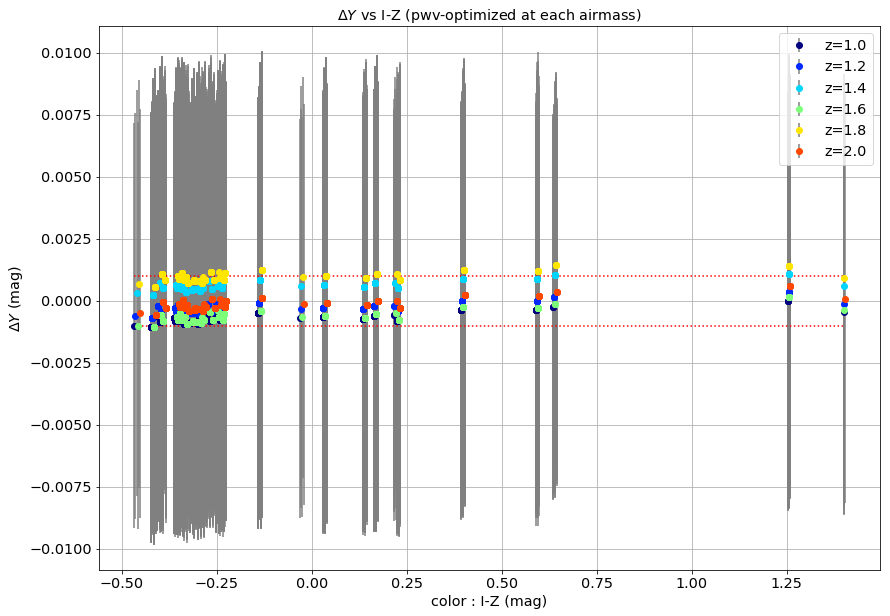

In [166]:
colormin=[]
colormax=[]

for idx in np.arange(NBFILES):    
    colorVal = scalarMap.to_rgba(idx)
    thelabel="z={:2.1f}".format(all_am[idx])
    data=np.loadtxt(os.path.join(path,sel_files[idx]))
    color=data[:,0]
    colormin.append(color.min())
    colormax.append(color.max())
    mag=data[:,1]
    err=data[:,2]
    #plt.plot(color,mag,'-',color=colorVal)
    plt.errorbar(color,mag, yerr=err, fmt='o',color=colorVal,ecolor='grey', label=thelabel) 

COLORMIN=np.min(np.array(colormin))   
COLORMAX=np.max(np.array(colormax))   

plt.plot([COLORMIN,COLORMAX],[0.001,0.001],"r:")
plt.plot([COLORMIN,COLORMAX],[-0.001,-0.001],"r:")    
plt.grid(True)
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend(loc='best')
#plt.ylim(YMIN,YMAX)
plt.savefig(figfilename)

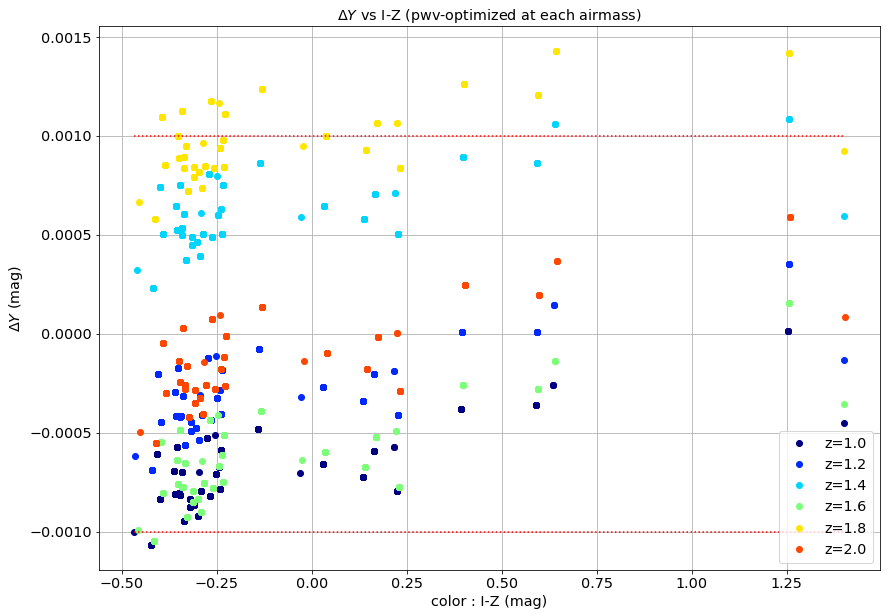

In [167]:
colormin=[]
colormax=[]

for idx in np.arange(NBFILES):    
    colorVal = scalarMap.to_rgba(idx)
    thelabel="z={:2.1f}".format(all_am[idx])
    data=np.loadtxt(os.path.join(path,sel_files[idx]))
    color=data[:,0]
    
    colormin.append(color.min())
    colormax.append(color.max())
    
    mag=data[:,1]
    err=data[:,2]
    plt.plot(color,mag,'o',color=colorVal,label=thelabel)
    #plt.errorbar(color,mag, yerr=err, fmt='o',color=colorVal,ecolor='grey', label=thelabel) 
    
COLORMIN=np.min(np.array(colormin))   
COLORMAX=np.max(np.array(colormax))   

plt.plot([COLORMIN,COLORMAX],[0.001,0.001],"r:")
plt.plot([COLORMIN,COLORMAX],[-0.001,-0.001],"r:")

plt.grid(True)
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend(loc='best')
#plt.ylim(YMIN,YMAX)
plt.savefig(figfilename)

In [168]:
colormin

[-0.46752315, -0.46460772, -0.46166515, -0.45905477, -0.4561289, -0.45353165]

In [169]:
COLORMIN

-0.46752315

In [170]:
COLORMAX

1.40184421

0    [ 0.00024485 -0.00063074]
1    [ 0.00022849 -0.00024058]
2    [0.00016733 0.00067862]
3    [ 0.00027504 -0.00056784]
4    [0.00016216 0.001034  ]
5    [ 2.57459934e-04 -6.64907532e-05]
slope = 0.0002226 +/- 4.321e-05 


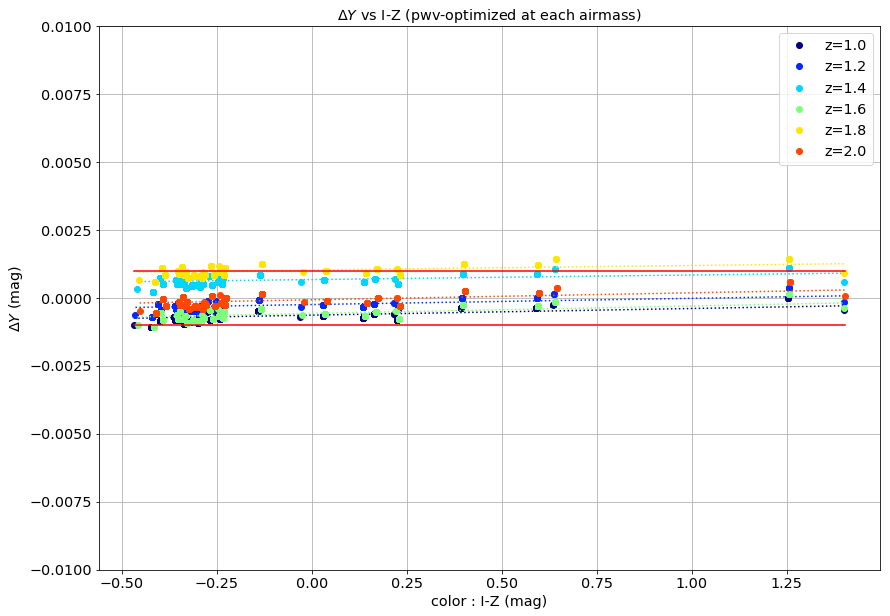

In [171]:
colormin=[]
colormax=[]
slope=[]
intercept=[]
for idx in np.arange(NBFILES):    
    colorVal = scalarMap.to_rgba(idx)
    thelabel="z={:2.1f}".format(all_am[idx])
    data=np.loadtxt(os.path.join(path,sel_files[idx]))
    color=data[:,0]
    
    colormin.append(color.min())
    colormax.append(color.max())
    
    mag=data[:,1]
    err=data[:,2]
    plt.plot(color,mag,'o',color=colorVal,label=thelabel)
    #plt.errorbar(color,mag, yerr=err, fmt='o',color=colorVal,ecolor='grey', label=thelabel) 
    X=color
    Y=mag
    Z = np.polyfit(X, Y,1)
    slope.append(Z[0])
    intercept.append(Z[1])
    print(idx,"  ",Z)
    P = np.poly1d(Z)
    plt.plot([color.min(),color.max()],[P(color.min()),P(color.max())],':',color=colorVal)
    
COLORMIN=np.min(np.array(colormin))   
COLORMAX=np.max(np.array(colormax))   

plt.plot([COLORMIN,COLORMAX],[0.001,0.001],"r-")
plt.plot([COLORMIN,COLORMAX],[-0.001,-0.001],"r-")

plt.grid(True)
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend(loc='best')
plt.ylim(YMIN,YMAX)
plt.savefig(figfilename)

slope=np.array(slope)

slope_mean=np.average(slope)
slope_std=np.std(slope)

print("slope = {:6.4g} +/- {:6.4g} ".format(slope_mean,slope_std))